You've been contracted in to help a hospital with operations and diagnoses.

## Surgery

First, you're brought into surgery, where the head of surgery has tasked you with predicting the length of stay of patients depending on which surgery/surgeries they require. 

From such information they can begin to start tackling the surgeries with the most inefficiencies and they can more effectively predict allocation of bed spaces to incoming patients. They'll also be able to work out the costs incurred from a given patient's surgeries.

Start by loading in the patient records of patients with surgery (`"case_study_data/patients.csv"`) and surgeries data (`"case_study_data/surgery.csv"`). In both cases, make your index patient_id.

Have a quick explore of this data and fill any missing surgery values with zeroes.

In [1]:
import pandas as pd
import numpy as np

# Your code here

patients = pd.read_csv('case_study_data/patients.csv', index_col='patient_id')
surgeries = pd.read_csv('case_study_data/surgery.csv', index_col='patient_id')

surgeries = surgeries.fillna(0)

Draw a histogram of patient ages to view the distribution of the ages of surgical patients.

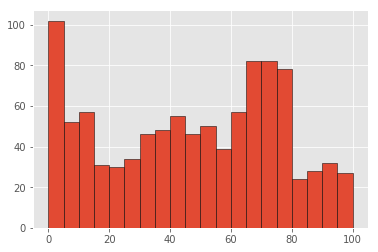

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.style.use('ggplot')

# Your code here

plt.hist(patients['age'], bins=20, range=(0, 100), edgecolor='black')
plt.show()

Now plot a boxplot of length of stay for each gender. You'll need to perform a join on the two tables.

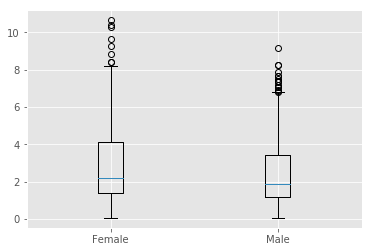

In [3]:
# Your code here

df = patients.join(surgeries)

plt.boxplot([
    df[df['gender'] == 'Female']['length_of_stay'],
    df[df['gender'] == 'Male']['length_of_stay']
], labels=['Female', 'Male'])
plt.show()

Now we'll create a linear regression model to predict length of stay given a patient's sex, age, and surgeries that were undertaken.

Drop the name of the patient from your Data Frame and convert the gender of the patient to an integer boolean (0 for female or 1 for male).

In [4]:
# Your code here

df = df.drop(['first_name', 'last_name'], axis=1)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

Now split the data into

* X (predictors) values and y (response) values 
* Testing and training set

using a test size of 0.25 and random state of 1 for repeatability.

In [5]:
from sklearn.model_selection import train_test_split 

# Your code here

X = df.drop(['length_of_stay'], axis=1)
y = df['length_of_stay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Use your training data set to create a linear regression model.

In [6]:
from sklearn import linear_model

# Your code here

lm = linear_model.LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

What is the $R^2$ value for your regression model using your test data?

In [7]:
# Your code here

lm.score(X_test, y_test)

0.8561696945821946

Given the following average prices of surgery and price of length of stay, what does the model predict the most expensive surgery is on average?
* General Surgery - £5,300
* Orthopaedic Surgery - £7,100
* Cardiothoracic Surgery - £5,100
* Neurosurgery - £4,900
* Oral Surgery - £1,200
* Plastic Surgery - £6,600
* Cost of hospital stay per day - £1,000

In [8]:
surgery_costs = {
    'general_surgery': 5300,
    'orthopaedic_surgery': 7100,
    'cardiothoracic_surgery': 5100,
    'neurosurgery': 4900,
    'oral_surgery': 1200,
    'plastic_surgery': 6600,
}
bed_cost_per_day = 1000

# Your code here

coefficients = {
    'gender': lm.coef_[0],
    'age': lm.coef_[1],
    'general_surgery': lm.coef_[2],
    'orthopaedic_surgery': lm.coef_[3],
    'cardiothoracic_surgery': lm.coef_[4],
    'neurosurgery': lm.coef_[5],
    'oral_surgery': lm.coef_[6],
    'plastic_surgery': lm.coef_[7]
}

for surgery_type in surgery_costs:
    surgery_cost = surgery_costs[surgery_type]
    bed_cost = coefficients[surgery_type] * bed_cost_per_day
    total_cost = round(surgery_cost + bed_cost, 2)
    print("Cost for {} is £{}".format(surgery_type, total_cost))

Cost for oral_surgery is £2260.5
Cost for cardiothoracic_surgery is £9833.53
Cost for orthopaedic_surgery is £8736.92
Cost for neurosurgery is £9922.29
Cost for plastic_surgery is £8076.46
Cost for general_surgery is £6888.0


Do men or women tend to stay in the hospital longer?

In [9]:
# Your code here

men = coefficients['gender'] * 1
women = coefficients['gender'] * 0

if men > women:
    print("Men spend longer in the hospital")
else:
    print("Women spend longer in the hospital")

Women spend longer in the hospital


For the following patients, make a prediction on their hospital stay length and costs:
* A 29 year old man that needs Plastic Surgery
* A 42 year old woman that needs Cardiothoracic and Orthopaedic Surgery
* A 72 year old man that needs 2 Oral Surgeries

In [10]:
# Your code here

patient1 = [1, 29, 0, 0, 0, 0, 0, 1]
patient2 = [0, 42, 0, 1, 1, 0, 0, 0]
patient3 = [0, 42, 0, 0, 0, 0, 2, 0]

predictions = lm.predict([patient1, patient2, patient3])

patient_1_stay = predictions[0]
patient_2_stay = predictions[1]
patient_3_stay = predictions[2]

patient_1_cost = surgery_costs['plastic_surgery'] + patient_1_stay * bed_cost_per_day
patient_2_cost = (surgery_costs['cardiothoracic_surgery'] + 
                  surgery_costs['orthopaedic_surgery'] 
                  + patient_2_stay * bed_cost_per_day)
patient_3_cost = surgery_costs['oral_surgery'] * 2 + patient_3_stay * bed_cost_per_day

print("Patient 1 will stay for {} days and cost £{}".format(round(patient_1_stay, 2), round(patient_1_cost, 2)))
print("Patient 2 will stay for {} days and cost £{}".format(round(patient_2_stay, 2), round(patient_2_cost, 2)))
print("Patient 3 will stay for {} days and cost £{}".format(round(patient_3_stay, 2), round(patient_3_cost, 2)))

Patient 1 will stay for 0.9 days and cost £7503.79
Patient 2 will stay for 6.52 days and cost £18718.86
Patient 3 will stay for 2.27 days and cost £4669.41


## Tumour Malignancy

You've now been asked to predict the malignancy of a breast cancer tumour given a range of physical measurements of the tumour.

Start by reading in the file `"data/breast_cancer.csv"`

In [11]:
# Your code here

breast_cancer = pd.read_csv('data/breast_cancer.csv')

Remove any rows that have been duplicated.

In [12]:
# Your code here

breast_cancer = breast_cancer.drop_duplicates()

Now split the data into

* X (predictors) values and y (response) values 
* Testing and training set

using a test size of 0.25 and random state of 1 for repeatability.

In [13]:
# Your code here

X = breast_cancer.drop('malignancy', axis=1)
y = breast_cancer['malignancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Now using a for loop, create a `KNeighborsClassifier` model, fit the model and test the accuracy when predicting the testing X (predictor) values for k values between 1 and 20. 

Which k value gives the most accurate predictions?

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Your code here

for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_predict = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print("Accuracy Score for k={} is {}".format(k, round(accuracy, 4)))

Accuracy Score for k=1 is 0.9231
Accuracy Score for k=2 is 0.9021
Accuracy Score for k=3 is 0.9231
Accuracy Score for k=4 is 0.9441
Accuracy Score for k=5 is 0.9371
Accuracy Score for k=6 is 0.9231
Accuracy Score for k=7 is 0.9301
Accuracy Score for k=8 is 0.9231
Accuracy Score for k=9 is 0.9231
Accuracy Score for k=10 is 0.9231
Accuracy Score for k=11 is 0.9231
Accuracy Score for k=12 is 0.9231
Accuracy Score for k=13 is 0.9231
Accuracy Score for k=14 is 0.9231
Accuracy Score for k=15 is 0.9231
Accuracy Score for k=16 is 0.9161
Accuracy Score for k=17 is 0.9161
Accuracy Score for k=18 is 0.9161
Accuracy Score for k=19 is 0.9161
Accuracy Score for k=20 is 0.9161


The problem with your accuracy score is that it doesn't give any information about false positives.

However, in this case, there's a lot more cost to have false negatives than false positives in this case. If you mis-diagnose someone with a benign tumour when it's malignant, this could have devastating effects for that patient.

Using the best k value above, create your own confusion matrix of:
```
True Positives  | False Negatives
--------------- | ---------------
False Positives | True Negatives
```

In [15]:
# Your code here

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)

true_positives = false_negatives = false_positives = true_negatives = 0

for idx in range(len(y_test)):
    if y_test.iloc[idx] == 1 and y_predict[idx] == 1:
        true_positives += 1
    elif y_test.iloc[idx] == 1 and y_predict[idx] == 0:
        false_negatives += 1
    elif y_test.iloc[idx] == 0 and y_predict[idx] == 0:
        true_negatives += 1
    else:
        false_positives += 1

np.array([[true_positives, false_negatives], [false_positives, true_negatives]])

array([[49,  6],
       [ 2, 86]])

If doctors are currently working on a 5% false negative rate, does your model perform better or worse than this?